In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Create dummy variable
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [5]:
#Concatenate data frames
X=pd.concat([X,geography,gender],axis=1)

In [6]:
#Drop unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [16]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#classifier.add(Dropout(0.2))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)


Epoch 1/10
536/536 [==============================] - 20s 3ms/step - loss: 0.6815 - accuracy: 0.6442 - val_loss: 0.5637 - val_accuracy: 0.7811
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7890 - val_loss: 0.5125 - val_accuracy: 0.7982
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4949 - accuracy: 0.8054 - val_loss: 0.4957 - val_accuracy: 0.7970
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.7970 - val_loss: 0.4860 - val_accuracy: 0.7963
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8041 - val_loss: 0.4780 - val_accuracy: 0.7970
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7985 - val_loss: 0.4712 - val_accuracy: 0.7978
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7985 - val_loss: 0.4643 - val_accuracy: 0.7993
Epoch

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


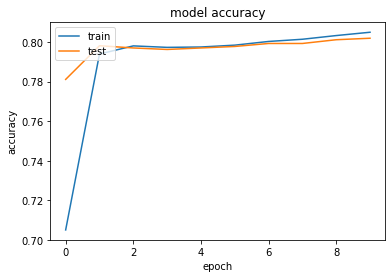

In [19]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


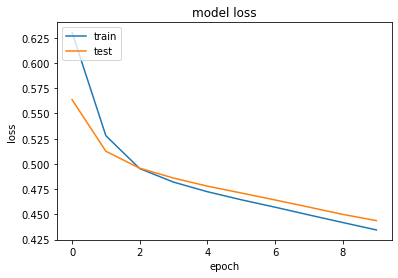

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
score

0.809